# LEAF CLASSIFICATION PROJECT

**TEAM**  
Kaido  
Sander  
Egert

**Training models that can classify leafs**  
**LINK:** https://www.kaggle.com/competitions/leaf-classification/data


In [28]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, confusion_matrix
from joblib import dump
import warnings
warnings.filterwarnings('ignore')

In [29]:
# IMPORTING DATA
train = pd.read_csv('../Data/train.csv')
test = pd.read_csv('../Data/test.csv')
sample_submission = pd.read_csv('../Data/sample_submission.csv')

In [30]:
# COPY AND PREPARE DATA
train_copy = train.copy()

# CONVERT SPECIES NAME TO ID
train_copy['species_id'], species_names = pd.factorize(train_copy['species'])
x = train_copy.drop(['id', 'species', 'species_id'], axis=1)
y = train_copy['species_id']

# DISPLAY DATA
print(f"SHAPE - {x.shape}")
print(f"SPECIES NUMBER - {len(species_names)}")

SHAPE - (990, 192)
SPECIES NUMBER - 99


In [31]:
# SPLIT DATA
# DATA FOR VALIDATION IS 20% AND FOR TRAINING 80%
x_train, x_val, y_train, y_val = train_test_split(x, y, random_state=1, test_size=0.2)
print(f"TRAINING DATA - {x_train.shape[0]}")
print(f"VALIDATION DATA - {x_val.shape[0]}")

TRAINING DATA - 792
VALIDATION DATA - 198


In [32]:
random_state = 1  # FOR REPRODUCABILITY

# VARIABLES FOR EVERY MODEL FOR DUMPING LATER
best_dt_model, best_dt_score, best_dt_params = None, 0, {}
best_rf_model, best_rf_score, best_rf_params = None, 0, {}
best_knn_model, best_knn_score, best_knn_params = None, 0, {}
best_lr_model, best_lr_score, best_lr_params = None, 0, {}

print("DT")
for criterion in ['gini', 'entropy']:
    for max_depth in [1, 10, 20, 30]:
        dt = DecisionTreeClassifier(criterion=criterion, max_depth=max_depth, random_state=random_state)
        dt.fit(x_train, y_train)
        score = dt.score(x_val, y_val)
        print(f"c-{criterion}, d-{max_depth}, ACC: {score:.4f}")
        if score > best_dt_score: # FINDING THE BEST PARAMETERS
            best_dt_model, best_dt_score, best_dt_params = dt, score, {'criterion': criterion, 'max_depth': max_depth}

print("RF")
for n_estimators in [10, 100, 200, 300]:
    for max_depth in [1, 5, 15, 30]:
        rf = RandomForestClassifier(n_estimators=n_estimators, max_depth=max_depth, random_state=random_state)
        rf.fit(x_train, y_train)
        score = rf.score(x_val, y_val)
        print(f"n-{n_estimators}, d-{max_depth}, ACC: {score:.4f}")
        if score > best_rf_score:
            best_rf_model, best_rf_score, best_rf_params = rf, score, {'n_estimators': n_estimators, 'max_depth': max_depth}

print("KNN")
for n_neighbors in [1, 3, 5, 15]:
    for weights in ['uniform', 'distance']:
        knn = KNeighborsClassifier(n_neighbors=n_neighbors, weights=weights)
        knn.fit(x_train, y_train)
        score = knn.score(x_val, y_val)
        print(f"k-{n_neighbors}, w-{weights}, ACC: {score:.4f}")
        if score > best_knn_score:
            best_knn_model, best_knn_score, best_knn_params = knn, score, {'n_neighbors': n_neighbors, 'weights': weights}

print("LR")
for C in [0.1, 1, 10, 100]:
    lr_l2 = LogisticRegression(C=C, penalty='l2', max_iter=2000, random_state=random_state)
    lr_l2.fit(x_train, y_train)
    score = lr_l2.score(x_val, y_val)
    print(f"C-{C}, L2 ACC: {score:.4f}")
    if score > best_lr_score:
        best_lr_model, best_lr_score, best_lr_params = lr_l2, score, {'C': C, 'penalty': 'l2'}

    lr_l1 = LogisticRegression(C=C, penalty='l1', solver='liblinear', max_iter=2000, random_state=random_state)
    lr_l1.fit(x_train, y_train)
    score = lr_l1.score(x_val, y_val)
    print(f"C-{C}, L1 ACC: {score:.4f}")
    if score > best_lr_score:
        best_lr_model, best_lr_score, best_lr_params = lr_l1, score, {'C': C, 'penalty': 'l1'}


DT
c-gini, d-1, ACC: 0.0000
c-gini, d-10, ACC: 0.1667
c-gini, d-20, ACC: 0.4293
c-gini, d-30, ACC: 0.5505
c-entropy, d-1, ACC: 0.0000
c-entropy, d-10, ACC: 0.6010
c-entropy, d-20, ACC: 0.6010
c-entropy, d-30, ACC: 0.6010
RF
n-10, d-1, ACC: 0.0202
n-10, d-5, ACC: 0.3182
n-10, d-15, ACC: 0.7929
n-10, d-30, ACC: 0.8535
n-100, d-1, ACC: 0.1010
n-100, d-5, ACC: 0.6566
n-100, d-15, ACC: 0.9343
n-100, d-30, ACC: 0.9747
n-200, d-1, ACC: 0.1212
n-200, d-5, ACC: 0.7020
n-200, d-15, ACC: 0.9495
n-200, d-30, ACC: 0.9646
n-300, d-1, ACC: 0.1465
n-300, d-5, ACC: 0.7020
n-300, d-15, ACC: 0.9545
n-300, d-30, ACC: 0.9747
KNN
k-1, w-uniform, ACC: 0.8990
k-1, w-distance, ACC: 0.8990
k-3, w-uniform, ACC: 0.8687
k-3, w-distance, ACC: 0.9040
k-5, w-uniform, ACC: 0.8586
k-5, w-distance, ACC: 0.8838
k-15, w-uniform, ACC: 0.6515
k-15, w-distance, ACC: 0.7374
LR
C-0.1, L2 ACC: 0.0051
C-0.1, L1 ACC: 0.0000
C-1, L2 ACC: 0.1768
C-1, L1 ACC: 0.0808
C-10, L2 ACC: 0.7071
C-10, L1 ACC: 0.8434
C-100, L2 ACC: 0.9192
C-1

In [33]:
# DISPLAY BEST MODEL RESULTS
# DISPLAY CONFUSION MATRIX
prediction = best_knn_model.predict(x_val)
model = confusion_matrix(y_val, prediction)
correct = np.trace(model)
total = np.sum(model)
accuracy = accuracy_score(y_val, prediction)

print(f"MODEL NAME: {best_knn_model}")
print(f"USED PARAMETERS: {best_knn_params}")
print(f"ACCURACY: {accuracy:.4f}")
print(f"CORRECT PREDICITON AMOUNT: {correct}/{total}")
print(f"CONFUSION MATRIX:\n {model}")

MODEL NAME: KNeighborsClassifier(n_neighbors=3, weights='distance')
USED PARAMETERS: {'n_neighbors': 3, 'weights': 'distance'}
ACCURACY: 0.9040
CORRECT PREDICITON AMOUNT: 179/198
CONFUSION MATRIX:
 [[3 0 0 ... 0 0 0]
 [0 2 0 ... 0 0 0]
 [0 0 4 ... 0 0 0]
 ...
 [0 0 0 ... 2 0 0]
 [0 0 0 ... 0 0 0]
 [0 0 0 ... 0 0 1]]


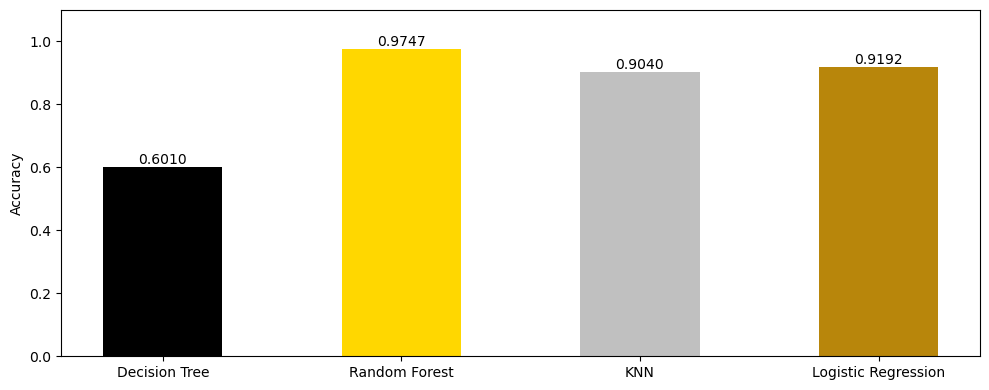

In [ ]:
# DISPLAY ALL MODELS ACCURACY ON A GRAPH
model_names = ['Decision Tree', 'Random Forest', 'KNN', 'Logistic Regression']
max_scores = [best_dt_score, best_rf_score, best_knn_score, best_lr_score]

plt.figure(figsize=(10, 4))
plt.bar(
    model_names, 
    max_scores, 
    width=0.5, 
    color=['black', 'gold', 'darkgoldenrod', 'silver']
)
for i, v in enumerate(max_scores):
    plt.text(i, v + 0.01, f'{v:.4f}', ha='center')
plt.ylabel('Accuracy')

plt.ylim(0, 1.1)
plt.tight_layout()
plt.show()

In [35]:
# CREATE A SUBMISSION FILE FOR THE BEST MODEL
x_full = pd.concat([x_train, x_val], ignore_index=True)
y_full = pd.concat([y_train, y_val], ignore_index=True)
best_knn_model.fit(x_full, y_full)
x_test = test.drop('id', axis=1) if 'id' in test.columns else test
test_proba = best_knn_model.predict_proba(x_test)
submission = pd.DataFrame(test_proba, columns=species_names)
sample_species_cols = sample_submission.columns.tolist()[1:]
submission = submission.reindex(columns=sample_species_cols, fill_value=0.0)
submission.insert(0, 'id', test['id'] if 'id' in test.columns else range(len(test)))
submission.to_csv('../Submissions/submission_KNN.csv', index=False)

In [36]:
# DUMP MODELS
dump(best_rf_model, '../Models/SimplerModels/rf_leaf_model.pkl')
dump(best_knn_model, '../Models/SimplerModels/knn_leaf_model.pkl')
dump(best_lr_model, '../Models/SimplerModels/lr_leaf_model.pkl')
dump(best_dt_model, '../Models/SimplerModels/dt_leaf_model.pkl')


['../Models/SimplerModels/dt_leaf_model.pkl']